In [18]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('/content/drive/MyDrive/kmeans-project/employee-compensation.csv')
df.head(5)

,Organization Group Code,Job Family Code,Job Code,Year Type,Year,Organization Group,Department Code,Department,Union Code,Union,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,1,1000,1021,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,57534.65,0.0,0.00,57534.65,11253.16,11961.34,4532.63,27747.13,85281.78
1,1,1000,1023,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,26574,57678.50,0.0,0.00,57678.50,10284.88,7176.80,4755.14,22216.82,79895.32
2,1,1000,1031,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,8148,63532.93,0.0,0.00,63532.93,12495.83,12918.24,4702.71,30116.78,93649.71
3,1,1000,1054,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,27436,101274.51,0.0,-7058.59,94215.92,19644.45,12918.24,7458.76,40021.45,134237.37
4,1,1000,1062,Calendar,2013,Public Protection,ADP,ADP Adult Probation,21.0,"Prof & Tech Engineers - Miscellaneous, Local 21",...,37730,5084.00,0.0,0.00,5084.00,1083.90,956.91,387.50,2428.31,7512.31


In [20]:
df.shape

(683277, 22)

In [21]:
df.describe()

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
count,683277.000000,683277.000000,682926.000000,6.832770e+05,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000,683277.000000
mean,2.977943,2016.364632,492.532173,1.708711e+07,69466.271313,5474.598046,3820.481201,78571.040544,13658.900273,9946.864621,5038.753940,28644.518833,107215.559377
std,1.579574,2.092180,330.911187,1.925902e+07,47771.799981,13110.029734,8386.602694,55751.218659,10110.075388,5732.982236,3787.981426,17869.713199,72291.710218
min,1.000000,2013.000000,1.000000,0.000000e+00,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-3831.090000,-10636.500000,-21295.150000,-74082.610000
25%,2.000000,2015.000000,250.000000,2.545000e+04,29009.540000,0.000000,0.000000,31676.040000,4662.960000,4780.680000,1870.410000,11716.230000,44439.440000
50%,2.000000,2017.000000,535.000000,5.097500e+04,67899.360000,0.000000,706.240000,74870.420000,13858.160000,12500.590000,4876.550000,32521.370000,107529.240000
75%,4.000000,2018.000000,790.000000,3.737703e+07,100416.890000,4223.390000,4362.880000,112666.100000,20151.850000,14037.160000,7525.560000,40915.930000,154170.540000
max,7.000000,2020.000000,990.000000,4.434643e+07,651936.710000,321523.310000,568163.120000,658867.570000,121952.520000,59405.230000,36815.390000,151645.180000,807625.250000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683277 entries, 0 to 683276
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Organization Group Code  683277 non-null  int64  
 1   Job Family Code          683277 non-null  object 
 2   Job Code                 683277 non-null  object 
 3   Year Type                683277 non-null  object 
 4   Year                     683277 non-null  int64  
 5   Organization Group       683277 non-null  object 
 6   Department Code          683275 non-null  object 
 7   Department               683275 non-null  object 
 8   Union Code               682926 non-null  float64
 9   Union                    682926 non-null  object 
 10  Job Family               683277 non-null  object 
 11  Job                      683272 non-null  object 
 12  Employee Identifier      683277 non-null  int64  
 13  Salaries                 683277 non-null  float64
 14  Over

In [23]:
df.isnull().sum()

Organization Group Code      0
Job Family Code              0
Job Code                     0
Year Type                    0
Year                         0
Organization Group           0
Department Code              2
Department                   2
Union Code                 351
Union                      351
Job Family                   0
Job                          5
Employee Identifier          0
Salaries                     0
Overtime                     0
Other Salaries               0
Total Salary                 0
Retirement                   0
Health and Dental            0
Other Benefits               0
Total Benefits               0
Total Compensation           0
dtype: int64

In [24]:
df.dtypes

Organization Group Code      int64
Job Family Code             object
Job Code                    object
Year Type                   object
Year                         int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family                  object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health and Dental          float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [25]:
col_name = df.columns
for i in col_name:
  print(i,'has :',df[i].nunique(),'Unique Values')

Organization Group Code has : 7 Unique Values
Job Family Code has : 59 Unique Values
Job Code has : 1210 Unique Values
Year Type has : 2 Unique Values
Year has : 8 Unique Values
Organization Group has : 7 Unique Values
Department Code has : 60 Unique Values
Department has : 109 Unique Values
Union Code has : 70 Unique Values
Union has : 129 Unique Values
Job Family has : 59 Unique Values
Job has : 1349 Unique Values
Employee Identifier has : 309750 Unique Values
Salaries has : 498512 Unique Values
Overtime has : 262033 Unique Values
Other Salaries has : 307854 Unique Values
Total Salary has : 615223 Unique Values
Retirement has : 451716 Unique Values
Health and Dental has : 209969 Unique Values
Other Benefits has : 496200 Unique Values
Total Benefits has : 616499 Unique Values
Total Compensation has : 658692 Unique Values


In [26]:
corr = df.corr()
corr

,Organization Group Code,Year,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
Organization Group Code,1.000000,-0.000707,-0.007614,-0.000483,-0.192644,-0.297225,-0.199240,-0.264133,-0.234457,-0.226974,0.032476,-0.198581,-0.252786
Year,-0.000707,1.000000,0.005063,0.838653,0.125284,0.080808,0.006865,0.124137,0.100216,0.161185,0.102326,0.130101,0.127894
Union Code,-0.007614,0.005063,1.000000,0.006614,-0.095213,0.059542,0.126444,-0.048234,-0.108697,-0.105928,-0.325772,-0.164550,-0.077872
Employee Identifier,-0.000483,0.838653,0.006614,1.000000,0.130882,0.081802,0.007155,0.128645,0.103993,0.174044,0.094587,0.134723,0.132513
Salaries,-0.192644,0.125284,-0.095213,0.130882,1.000000,0.259388,0.256029,0.957367,0.947414,0.758175,0.727234,0.933410,0.969048
Overtime,-0.297225,0.080808,0.059542,0.081802,0.259388,1.000000,0.291799,0.501886,0.311104,0.299804,0.091990,0.291696,0.459157
Other Salaries,-0.199240,0.006865,0.126444,0.007155,0.256029,0.291799,1.000000,0.415493,0.279956,0.155871,0.051601,0.219334,0.374644
Total Salary,-0.264133,0.124137,-0.048234,0.128645,0.957367,0.501886,0.415493,1.000000,0.928071,0.745430,0.653085,0.902661,0.994326
Retirement,-0.234457,0.100216,-0.108697,0.103993,0.947414,0.311104,0.279956,0.928071,1.000000,0.782788,0.677955,0.960612,0.953180
Health and Dental,-0.226974,0.161185,-0.105928,0.174044,0.758175,0.299804,0.155871,0.745430,0.782788,1.000000,0.626897,0.896584,0.796500


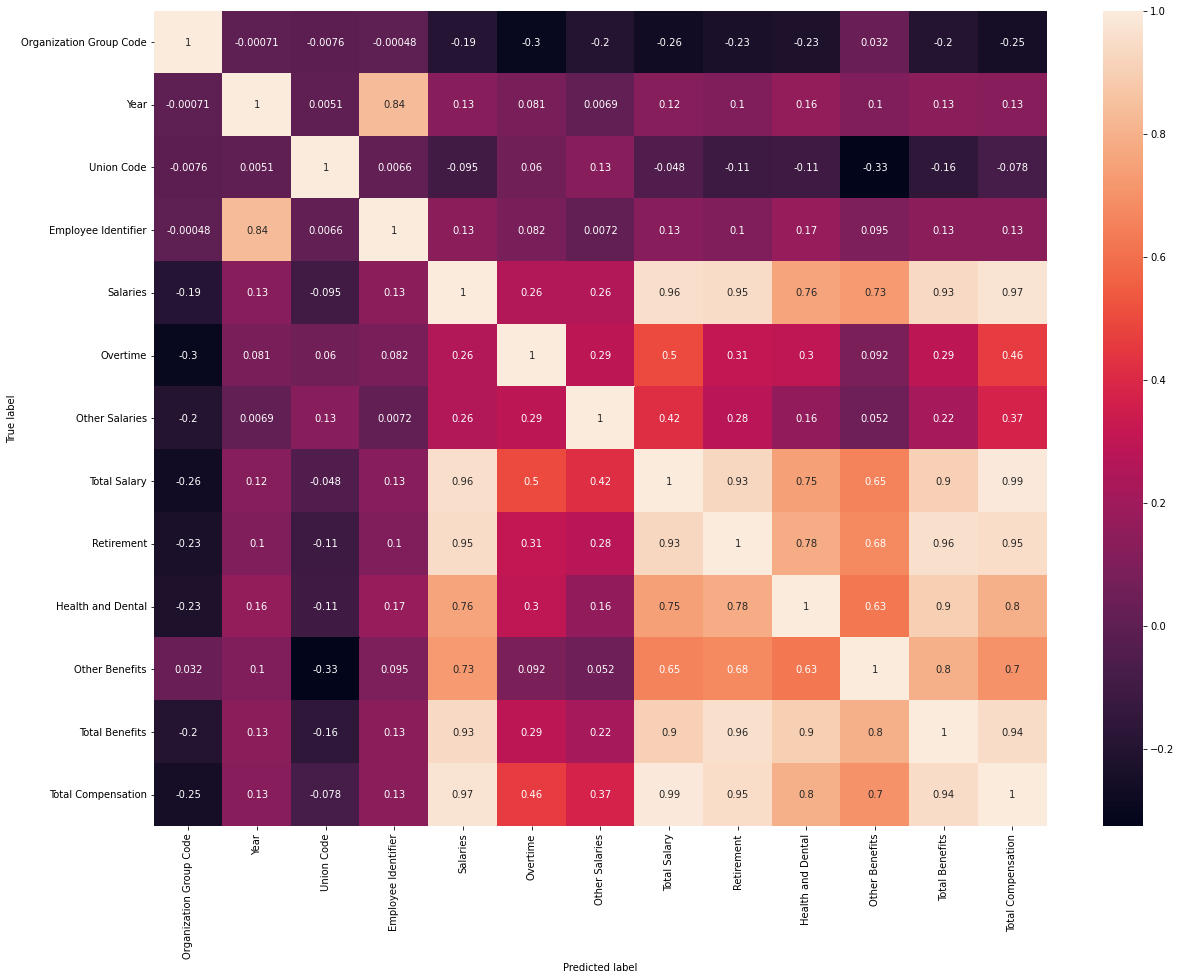

In [27]:
# Making the Confusion Matrix

plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
# x=df[(df['Total Salary']!='?')]
# x= x.Total Salary.median()
# x

In [29]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [30]:
K = range(1,10)
X = df.drop(['Organization Group Code','Job Family Code','Job Code','Year Type','Year','Organization Group','Department Code','Department','Union Code','Union','Job Family','Job','Employee Identifier','Salaries','Overtime','Other Salaries','Retirement','Health and Dental','Other Benefits','Total Benefits'],axis=1)
#X.head(5)
KM = [KMeans(n_clusters=k).fit(X) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

In [31]:
# class_val = X.columns[X.dtypes =='float64']
# df_new = pd.get_dummies(X,columns = class_val)
# df_new.rename(columns={'Total Salary':'Total_Salary'},inplace = True)
# df_new.drop('Total Salary',axis = 1,inplace = True)
# X = df_new

In [ ]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(X)**2)/X.shape[0]
bss = tss-wcss
varExplained = bss/tss*100